In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Train_Dataset\closed_eyes\s0001_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

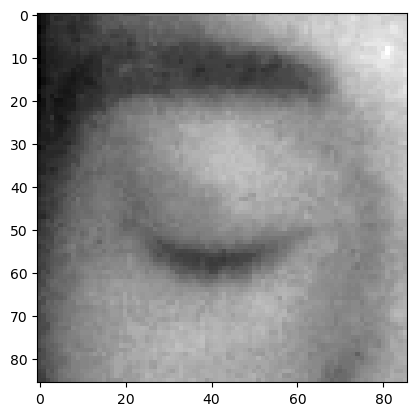

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(86, 86)

# Resizing All the Images

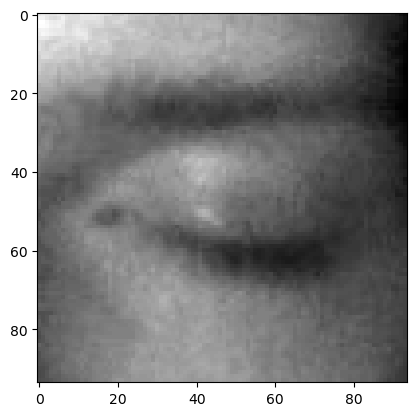

In [5]:
DataDirectory = "Test_Dataset/" 
Classes = ["closed_eyes","open_eyes"]
for category in Classes:
    path = os.path.join(DataDirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap = "gray")
        plt.show()
        break
    break

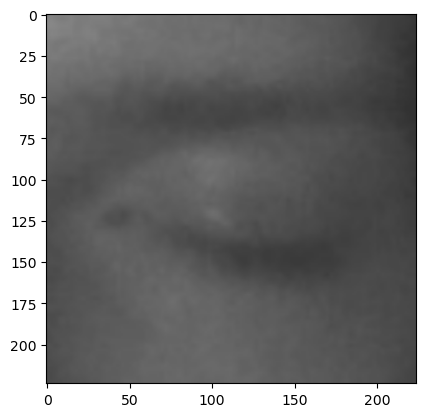

In [6]:
img_size = 224

new_array = cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap = "gray")
plt.show()

# Reading all the Images and Converting them into an array for Data and Lebels

In [7]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(DataDirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

2016


# Perform Random Shuffling to Avoid Overfitting

In [10]:
import random
random.shuffle(training_Data)

# Splitting into Data and Levels

In [11]:
x = []
y = []

for features,label in training_Data:
    x.append(features)
    y.append(label)

X = np.array(x).reshape(-1,img_size,img_size,3)

In [12]:
X.shape

(2016, 224, 224, 3)

# Normalize the Data

In [13]:
X = X/255.0;

In [14]:
Y = np.array(y) # lebels into numpy array

In [15]:
# To save all the data
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

# In Order to use the created and saved data - Just use 
pickle_in = open("X_pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# Creating Learning Model for Training - Transfer Learning

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
from tensorflow.compat.v1.train import Optimizer

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

# Transfer Learning

In [20]:
base_input = model.layers[0].input ## Input

In [21]:
base_output = model.layers[-4].output ## Output

In [22]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ## One Node (1/0)
final_output = layers.Activation('sigmoid')(final_output)

In [23]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

# Settings for Binary Classification(Open/Closed)

In [25]:
new_model.compile(loss = "binary_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [118]:
new_model.fit(X,Y,epochs=1,validation_split=0.1)  ## Training

57/57 [==============================] - 110s 2s/step - loss: 0.2774 - accuracy: 0.9791 - val_loss: 5.9773 - val_accuracy: 0.5990


In [66]:
# Saving the Model
new_model.save('my_model.keras')

In [147]:
new_model = tf.keras.models.load_model('my_model.h5')

# Checking the Model for Predictions

In [162]:
img_array = cv2.imread("s0001_00007_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))

In [163]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [164]:
X_input.shape

(1, 224, 224, 3)

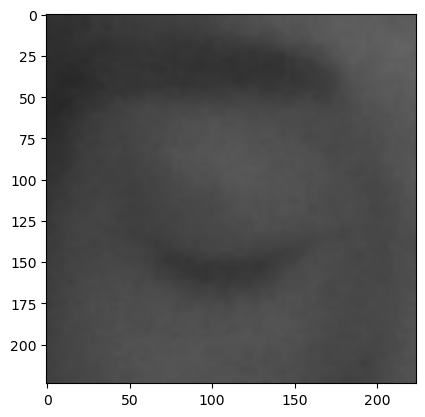

In [165]:
plt.imshow(new_array)

In [166]:
X_input = X_input / 255.0

In [167]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 0s 90ms/step


In [168]:
prediction

array([[21.562683]], dtype=float32)

# Check For Unknown Images

In [179]:
img = cv2.imread('images.jpeg')

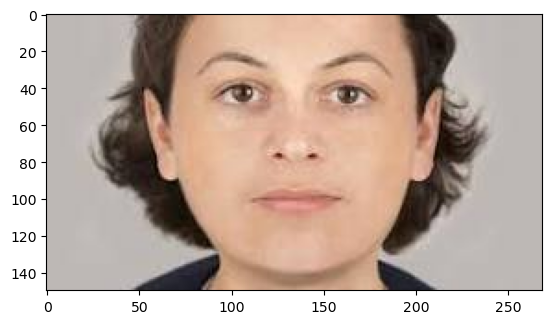

In [180]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [181]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

In [183]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye_tree_eyeglasses.xml')

In [185]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Converting to Gray

In [188]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4) # Drawing rectangle on the image

In [189]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

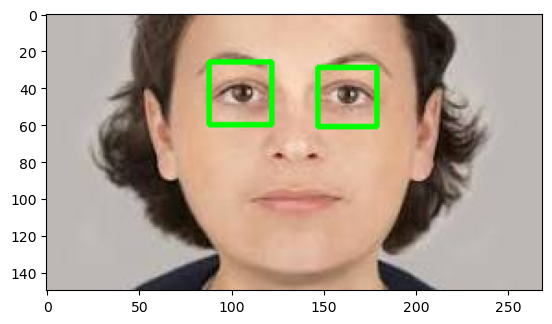

In [190]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Cropping Eye Image

In [195]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h,x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("Eyes are Not Detected")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]

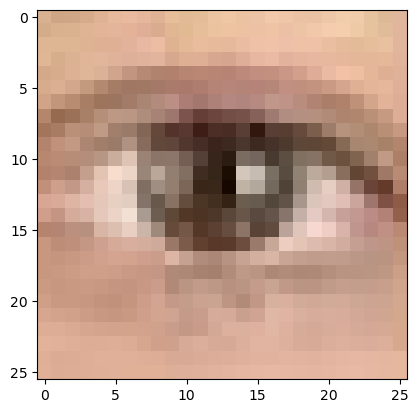

In [196]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [198]:
eyes_roi.shape

(26, 26, 3)

In [199]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [200]:
final_image.shape

(1, 224, 224, 3)

In [201]:
new_model.predict(final_image)

1/1 [==============================] - 0s 444ms/step


array([[24.221807]], dtype=float32)

# Real Time Implementation

In [212]:
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot Open WebCam")
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes Not Detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]
        
    final_image = cv2.resize(eyes_roi,(224,224))
    final_image = np.expand_dims(final_image,axis = 0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions>0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    # Draw Rectangle Around Face
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    cv2.putText(frame,status,(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow("Drowsiness Detection",frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Eyes Not Detected
1/1 [==============================] - 0s 242ms/step
False
Eyes Not Detected
Eyes Not Detected
1/1 [==============================] - 0s 108ms/step
False
Eyes Not Detected
1/1 [==============================] - 0s 91ms/step
False
1/1 [==============================] - 0s 76ms/step
False
Eyes Not Detected
Eyes Not Detected
1/1 [==============================] - 0s 89ms/step
False
Eyes Not Detected
1/1 [==============================] - 0s 67ms/step
False
Eyes Not Detected
1/1 [==============================] - 0s 95ms/step
False
1/1 [==============================] - 0s 79ms/step
False
1/1 [==============================] - 0s 79ms/step
False
Eyes Not Detected
1/1 [==============================] - 0s 80ms/step
False
1/1 [==============================] - 0s 68ms/step
False
1/1 [==============================] - 0s 71ms/step
False
Eyes Not Detected
Eyes Not Detected
1/1 [==============================] - 0s 69ms/step
False
1/1 [==============================] - 0s 68ms

# Detect Drowsiness

In [219]:
import winsound
frequency = 2500
duration = 1000
import numpy as np
import cv2

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot Open WebCam")
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes Not Detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]
        
    final_image = cv2.resize(eyes_roi,(224,224))
    final_image = np.expand_dims(final_image,axis = 0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions>0):
        status = "Open Eyes"
        cv2.putText(frame,status,(150,150),font,3,(0,255,0),2,cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, 'Active', (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    else:
        counter = counter+1
        status = "Closed Eyes"
        cv2.putText(frame,status,(150,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        if counter > 5:
            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
            cv2.putText(frame,'Sleep Alert !!',(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
            winsound.Beep(frequency,duration)
            counter=0
            
    cv2.imshow('Drowsiness Detection',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 68ms/step
Eyes Not Detected
Eyes Not Detected
1/1 [==============================] - 0s 58ms/step
Eyes Not Detected
1/1 [==============================] - 0s 60ms/step
Eyes Not Detected
1/1 [==============================] - 0s 67ms/step
Eyes Not Detected
1/1 [==============================] - 0s 66ms/step
Eyes Not Detected
1/1 [==============================] - 0s 60ms/step
Eyes Not Detected
1/1 [==============================] - 0s 63ms/step
Eyes Not Detected
1/1 [==============================] - 0s 57ms/step
Eyes Not Detected
1/1 [==============================] - 0s 65ms/step
Eyes Not Detected
1/1 [==============================] - 0s 72ms/step
Eyes Not Detected
1/1 [==============================] - 0s 65ms/step
Eyes Not Detected
1/1 [==============================] - 0s 57ms/step
Eyes Not Detected
1/1 [==============================] - 0s 57ms/step
Eyes Not Detected
1/1 [==============================] - 0s 57ms/step
Eyes Not Detected
1/